Importing Libraries

In [54]:
import numpy as np
import pandas as pd
import plotly

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import plotly.express as px 
import plotly.graph_objs as go
from plotly.offline import iplot 

from math import sqrt
import warnings

Reading the Data from the CSV file
So here we will be dealing with a bunch of CSVs files

train.csv: In this, we will be performing our training

features.csv: This CSV file holds all the main features which need to be analyzed for sales.

stores.csv: It holds the type and size of stores.

test.csv: From this data, we will be analyzing our model for testing purposes (after model building)

In [55]:
train_df=pd.read_csv('train.csv')
features_df=pd.read_csv('features.csv')
stores_df=pd.read_csv('stores.csv')
test_df=pd.read_csv('test.csv')
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [56]:
train_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

Let's see the shape of the training dataset

In [57]:
train_df.shape

(421570, 5)

About training dataset

In [58]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [59]:
train_df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [60]:
train_df.isnull().head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [61]:
train_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

Let's see our features data now

In [62]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


Let's look at the columns for our features data:

In [63]:
features_df.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

The shape of the features dataset

In [64]:
features_df.shape

(8190, 12)

Now, let's look at the null values in this file

In [65]:
features_df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

Let's explore our store's dataset

In [66]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


Let’s see the columns in our store’s table

In [67]:
stores_df.columns

Index(['Store', 'Type', 'Size'], dtype='object')

The shape of the store’s data

In [68]:
stores_df.shape

(45, 3)

Let's see what type of data does it holds

In [69]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


Data Visualization

Visualizing the type of the stores along with their percentage

In [75]:
label=stores_df["Type"].value_counts()[:10].index
counts=stores_df["Type"].value_counts()[:10].values

colors=stores_df["Type"]


fig=go.Figure(data=[go.Pie(labels=label,values=counts)])
fig.show()

Inference: Here from the above pie chart it is clearly visible that Type c has the minimum number of stores while Type A has the maximum number of stores.

While looking at the features it is evident that stores CSV files have “Store” as a repetitive column so it’s better to merge those columns to avoid confusion and to add the clarification in the dataset for future visualization.

Using the merge function to merge and we are merging along the common column named Store

In [50]:
dataset = features_df.merge(stores_df, how='inner', on='Store')
dataset.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


Here we will be looking at the number of columns and its kind of dataset.

In [76]:
dataset.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Type', 'Size'],
      dtype='object')

Now let’s see the type of our features and the count of null values.

In [77]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
 12  Type          8190 non-null   object 
 13  Size          8190 non-null   int64  
dtypes: bool(1), float64(9), int64(2), object(2)
memory usage: 903.8+ KB


Since the Date in the above dataset is a string value we can convert them into DateTime using the DateTime.

Describing the dataset

In [78]:
dataset.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000,8190.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821,130287.600000
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259,63115.971429
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000,34875.000000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000,70713.000000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000,126512.000000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000,202307.000000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000,219622.000000


Visualizing the Type of the Stores along with their percentage in the dataset.

In [81]:
label=dataset["Type"].value_counts()[:10].index
counts=dataset["Type"].value_counts()[:10].values

colors=dataset["Type"]
fig=go.Figure(data=[go.Pie(values=counts,labels=label)])
fig.show()

Inference: Here from the above pie chart it is clearly visible that Type c has the minimum number of stores while Type A has the maximum number of stores.

Let’s look into the testing dataset.

Note: Here Date is of an object type.

Now let’s see the type of our features and the count of null values

In [82]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


Here we can see that Store and department are of integer type, IsHoliday is of boolean type and date is of the object type.

In [83]:
label=train_df["Store"].value_counts()[:10].index
count=train_df["Store"].value_counts()[:10].values

colors=train_df["Store"]
fig=go.Figure(data=[go.Pie(values=count,labels=label)])

fig.show()

Inference: Here we can see that each store holds nearly 10% distribution.

In [84]:
label=train_df['IsHoliday'].value_counts().index
count=train_df['IsHoliday'].value_counts().values

colors=train_df['IsHoliday']

fig=go.Figure(data=[go.Pie(values=count,labels=label)])
fig.show()

Inference: So in this pie chart it is evident that 93% of the time there is no holiday in the stores

A total number of columns in the test_df

In [85]:
test_df.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday'], dtype='object')

To know more about the test_df

In [86]:
test_df.describe()

,Store,Dept
count,115064.000000,115064.000000
mean,22.238207,44.339524
std,12.809930,30.656410
min,1.000000,1.000000
25%,11.000000,18.000000
50%,22.000000,37.000000
75%,33.000000,74.000000
max,45.000000,99.000000


In [88]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


As we know that our date time column is in object form but we need to change that into integer/numeral type so that our machine learning algorithm should understand the date data during the model building phase.

In [89]:
from datetime import datetime
dataset['Date']=pd.to_datetime(dataset['Date'])
train_df['Date']=pd.to_datetime(train_df['Date'])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [90]:
dataset['Week']=dataset.Date.dt.week #for the week
dataset['Year']=dataset.Date.dt.year #for the year

dataset.head()

C:\Users\Hriti\AppData\Local\Temp\ipykernel_4444\2415003458.py:1: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.



,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Week,Year
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,2010
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315,6,2010
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315,7,2010
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315,8,2010
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315,9,2010


Merging with train_df

In [91]:
train_merge=train_df.merge(dataset,how='inner',on=['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)

In [98]:
test_df['Date'] = pd.to_datetime(test_df['Date'])

In [99]:
merged_df = pd.concat([test_df, dataset], axis=0)

Merging with test_df

In [100]:
test_merge=test_df.merge(dataset,how='inner',on=['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)

Now we will make the function to plot the scatter plot for various relationships.

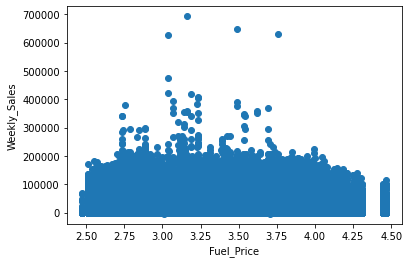

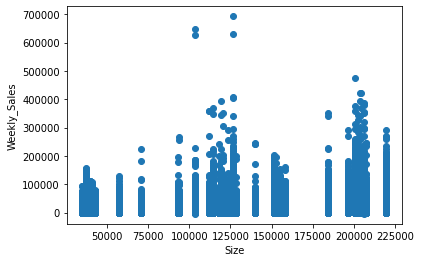

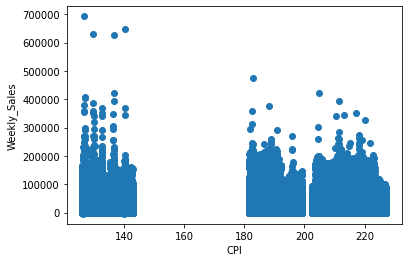

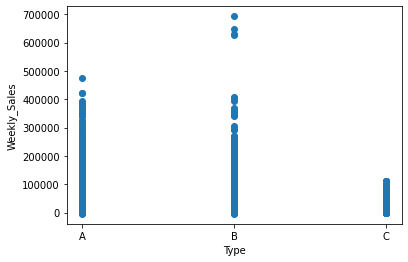

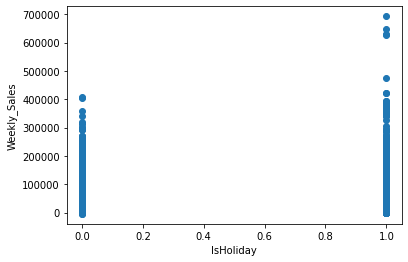

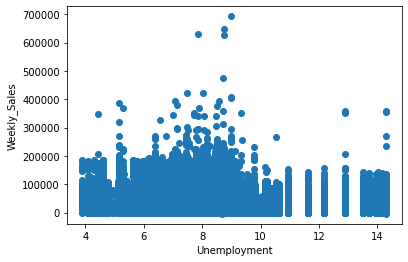

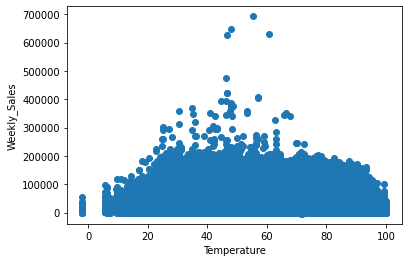

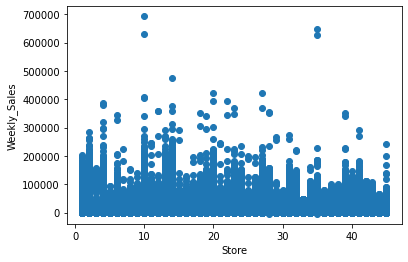

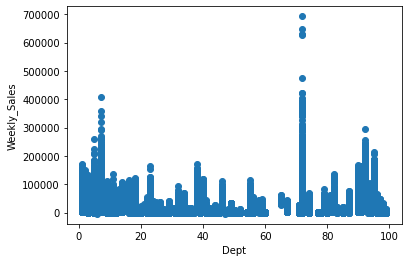

In [101]:
def scatter (train_merge, column):
    plt.figure()
    plt.scatter(train_merge[column],train_merge['Weekly_Sales'])
    plt.ylabel('Weekly_Sales')
    plt.xlabel(column)

scatter(train_merge, 'Fuel_Price') # with respect to Fuel_Price
scatter(train_merge, 'Size') # with respect to Size 
scatter(train_merge, 'CPI') # with respect to CPI
scatter(train_merge, 'Type') # with respect to Type
scatter(train_merge, 'IsHoliday') # with respect to IsHoliday 
scatter(train_merge, 'Unemployment') # with respect to Unemployment
scatter(train_merge, 'Temperature') # with respect to Temperature
scatter(train_merge, 'Store') # with respect to Store
scatter(train_merge, 'Dept') # with respect to Dept

Correlation Matrix

Now with the help of scatter charts, we will be looking at the average sales per week for different years i.e. we will find out about the weekly sales per week for the years 2010, 2011, and 2012.

Average Weekly Sales for the year 2010

<AxesSubplot:xlabel='Week'>

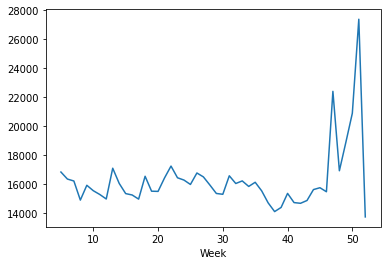

In [104]:
import seaborn as sns

weekly_sales_2010=train_merge[train_merge['Year']==2010]['Weekly_Sales'].groupby(train_merge['Week']).mean()
sns.lineplot(x=weekly_sales_2010.index, y=weekly_sales_2010.values) #for plotting the lineplot

Average Weekly Sales for the year 2011

<AxesSubplot:xlabel='Week'>

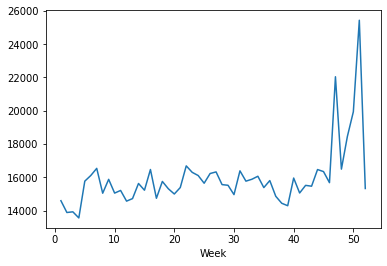

In [107]:
weekly_sales_2011=train_merge[train_merge['Year']==2011]['Weekly_Sales'].groupby(train_merge['Week']).mean()

sns.lineplot(x=weekly_sales_2011.index, y=weekly_sales_2011.values) #  for plotting the lineplot

Average Weekly Sales for the year 2011

<AxesSubplot:xlabel='Week'>

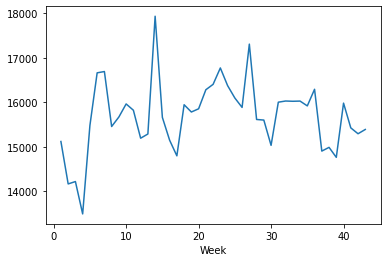

In [109]:
weekly_sales_2012=train_merge[train_merge['Year']==2012]['Weekly_Sales'].groupby(train_merge['Week']).mean()

sns.lineplot(x=weekly_sales_2012.index, y=weekly_sales_2012.values) #for plotting then lineplot

Average Weekly Sales for the year 2012

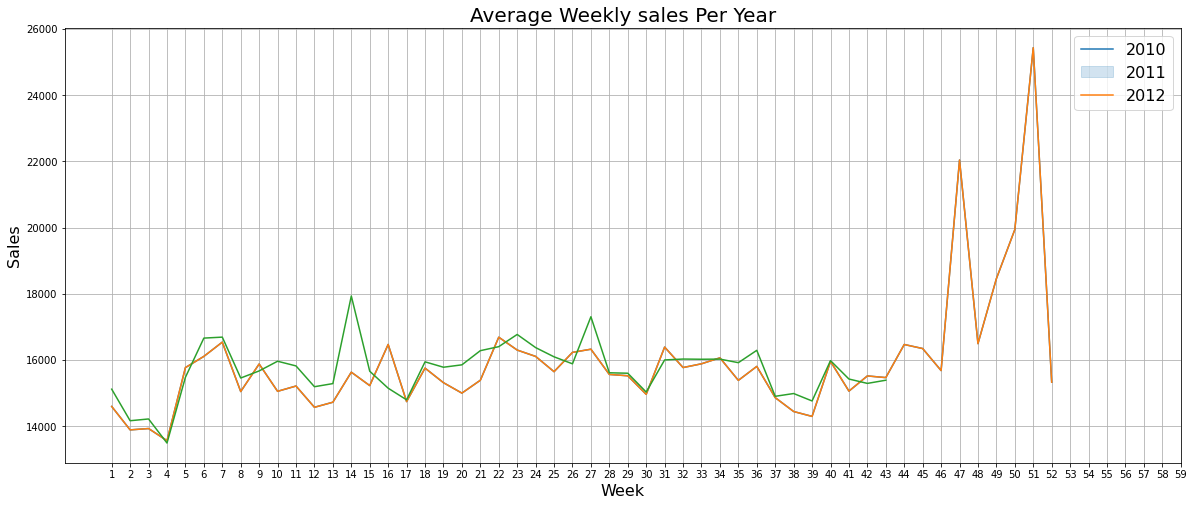

In [112]:
plt.figure(figsize=(20,8))
sns.lineplot(x=weekly_sales_2010.index, y=weekly_sales_2010.values)
sns.lineplot(x=weekly_sales_2011.index, y=weekly_sales_2011.values)
sns.lineplot(x=weekly_sales_2012.index, y=weekly_sales_2012.values)
plt.grid()
plt.xticks(np.arange(1, 60, step=1))
plt.legend(['2010','2011','2012'], loc='best', fontsize=16)
plt.title('Average Weekly sales Per Year', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

Combining the above plots into one for better understanding

Average Sales per Department

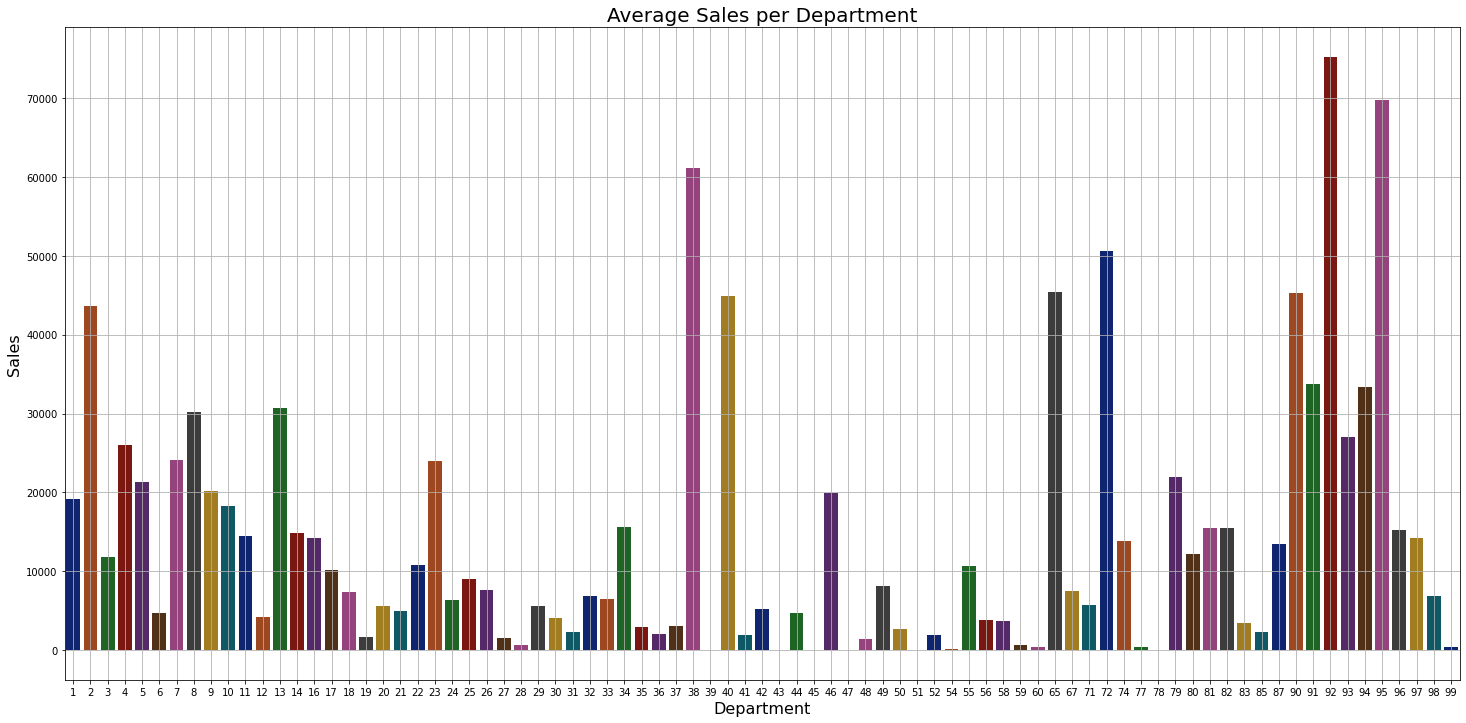

In [114]:
weekly_sales=train_merge['Weekly_Sales'].groupby(train_merge['Dept']).mean()
plt.figure(figsize=(25,12))
sns.barplot(x=weekly_sales.index, y=weekly_sales.values, palette='dark')
plt.grid()
plt.title('Average Sales per Department', fontsize=20)
plt.xlabel('Department', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.show()

Inference: As shown in the above graph we can see that 90 to 98 departments have the highest sales in general.

Average Sales per Store

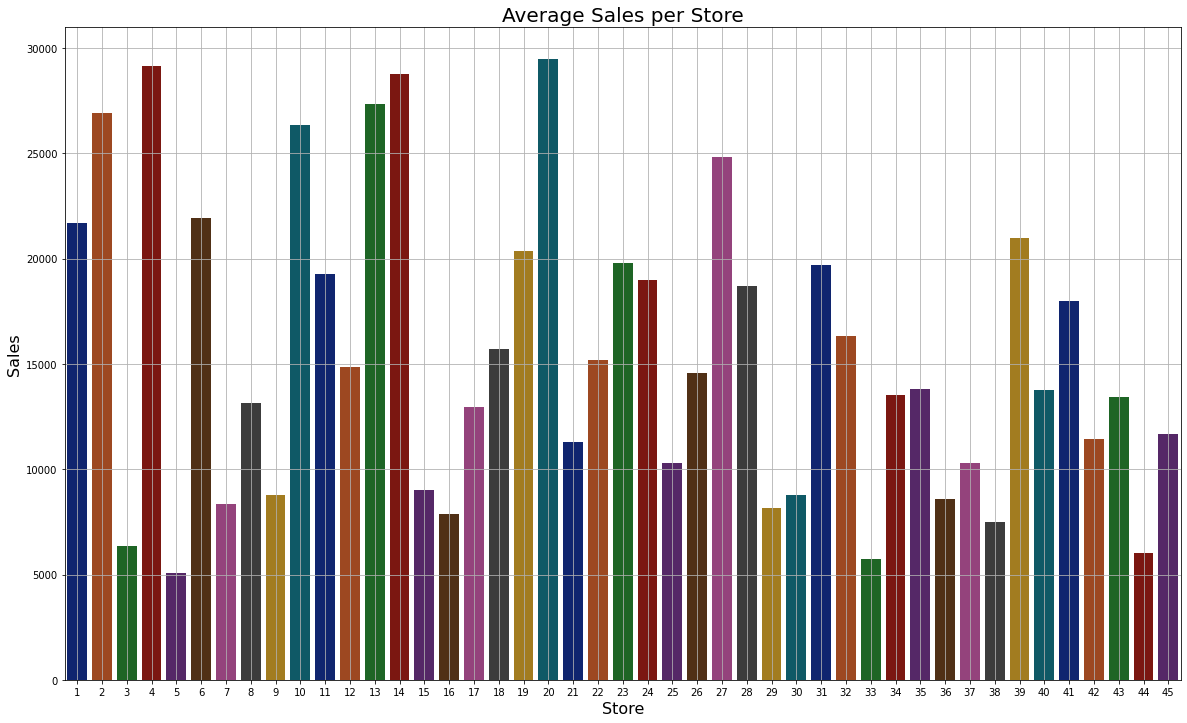

In [116]:
weekly_sales=train_merge['Weekly_Sales'].groupby(train_merge['Store']).mean()
plt.figure(figsize=(20,12))
sns.barplot(x=weekly_sales.index, y=weekly_sales.values, palette='dark')
plt.grid()
plt.title('Average Sales per Store', fontsize=20)
plt.xlabel('Store', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.show()

Inference: As we can see that store no 20 has the highest sales.

C:\Users\Hriti\AppData\Local\Temp\ipykernel_4444\3835247057.py:4: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



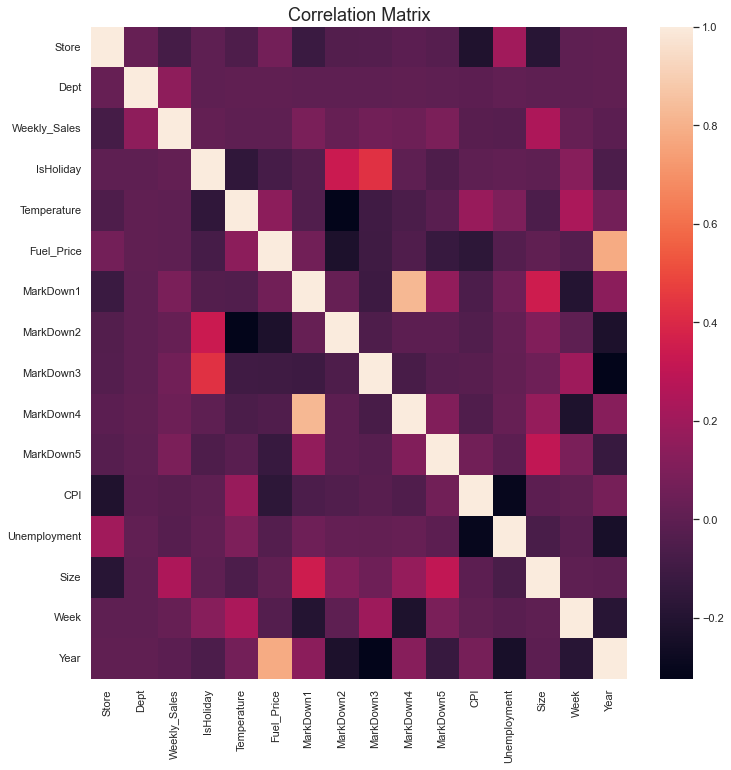

In [118]:
plt.figure(figsize=(12,12))
sns.set(style="white")
corr=train_merge.corr()
mask=np.triu(np.ones_like(corr, dtype=np.bool))
# f, ax=plt.subplots(figsize=(20, 15))
cmap=sns.diverging_palette(220, 10, as_cmap=True)
plt.title('Correlation Matrix', fontsize=18)
sns.heatmap(corr)
plt.show()

So now from the above graph, we have found out which features are highly correlated with each other so now we will be removing those features to remove the bias from the dataset.

In [119]:
train_merge=train_merge.drop(columns=['Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4','MarkDown5'])
test_merge=test_merge.drop(columns=['Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4','MarkDown5'])

Now as we have successfully sorted the features data which is completely clean and ready to use for the model phase so for the last time let’s see our cleaned training and testing data.

In [120]:
train_merge.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,CPI,Unemployment,Type,Size,Week,Year
0,1,1,2010-02-05,24924.50,False,42.31,211.096358,8.106,A,151315,5,2010
1,1,1,2010-02-12,46039.49,True,38.51,211.242170,8.106,A,151315,6,2010
2,1,1,2010-02-19,41595.55,False,39.93,211.289143,8.106,A,151315,7,2010
3,1,1,2010-02-26,19403.54,False,46.63,211.319643,8.106,A,151315,8,2010
4,1,1,2010-03-05,21827.90,False,46.50,211.350143,8.106,A,151315,9,2010


In [121]:
test_merge.head()

,Store,Dept,Date,IsHoliday,Temperature,CPI,Unemployment,Type,Size,Week,Year
0,1,1,2012-11-02,False,55.32,223.462779,6.573,A,151315,44,2012
1,1,1,2012-11-09,False,61.24,223.481307,6.573,A,151315,45,2012
2,1,1,2012-11-16,False,52.92,223.512911,6.573,A,151315,46,2012
3,1,1,2012-11-23,True,56.23,223.561947,6.573,A,151315,47,2012
4,1,1,2012-11-30,False,52.34,223.610984,6.573,A,151315,48,2012


Getting the columns in the train_merge

In [122]:
train_merge.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'CPI', 'Unemployment', 'Type', 'Size', 'Week', 'Year'],
      dtype='object')

Getting the columns in test_merge

In [123]:
test_merge.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday', 'Temperature', 'CPI',
       'Unemployment', 'Type', 'Size', 'Week', 'Year'],
      dtype='object')